# Hand written digits dataset prediction using ANN and CNN

In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [26]:
(X_train, y_train), (X_test, y_test)=keras.datasets.mnist.load_data()

In [27]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [28]:
len(X_test)

10000

In [29]:
X_train[0].shape

(28, 28)

In [30]:
X_train=(X_train/255)
X_test=(X_test/255)

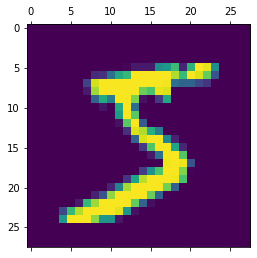

In [31]:
plt.matshow(X_train[0])

In [32]:
X_train_flattened=X_train.reshape(len(X_train), 28*28)
X_test_flattened=X_test.reshape(len(X_test), 28*28)
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
X_test_flattened.shape

(10000, 784)

## ANN training

In [34]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
          optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 929us/step - loss: 0.4689 - accuracy: 0.8783
Epoch 2/5
1875/1875 [==============================] - 2s 880us/step - loss: 0.3044 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 864us/step - loss: 0.2835 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 861us/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 865us/step - loss: 0.2665 - accuracy: 0.9261


In [35]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 913us/step - loss: 0.2671 - accuracy: 0.9267


[0.2670750617980957, 0.9266999959945679]

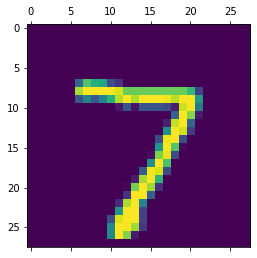

In [36]:
plt.matshow(X_test[0])

In [37]:
y_predicted= model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 758us/step


array([3.4577608e-02, 2.8198107e-07, 6.5515801e-02, 9.5556933e-01,
       3.7671544e-03, 1.0826192e-01, 1.1117812e-06, 9.9982810e-01,
       1.2234423e-01, 6.7954606e-01], dtype=float32)

In [38]:
np.argmax(y_predicted[0])

7

In [39]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:3]

[7, 2, 1]

In [40]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [41]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    3,    1,    0,    5,    6,    4,    2,    0],
       [   0, 1110,    4,    1,    0,    1,    4,    2,   13,    0],
       [   3,    9,  927,   16,    9,    3,   11,   10,   41,    3],
       [   2,    0,   20,  917,    2,   22,    2,   10,   28,    7],
       [   1,    1,    4,    1,  926,    0,   10,    4,    9,   26],
       [  10,    3,    4,   28,   11,  764,   17,    9,   39,    7],
       [   8,    3,    8,    1,    7,   12,  914,    2,    3,    0],
       [   1,    5,   24,    2,    9,    0,    0,  958,    3,   26],
       [   5,    6,    7,   14,    9,   18,    9,   14,  886,    6],
       [  10,    7,    2,    7,   36,    6,    0,   29,    6,  906]])>

Text(69.0, 0.5, 'truth')

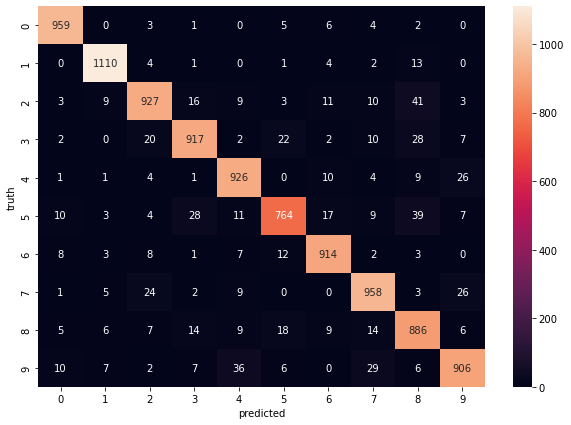

In [42]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

hidden layers can be increased to increase accuracy of model and train/test dataset can be flattened using keras

## CNN training

In [48]:
X_test_flattened.shape

(10000, 784)

In [45]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_flattened)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 0s 745us/step
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.93      0.91      0.92      1010
           4       0.92      0.94      0.93       982
           5       0.92      0.86      0.89       892
           6       0.94      0.95      0.95       958
           7       0.92      0.93      0.93      1028
           8       0.86      0.91      0.88       974
           9       0.92      0.90      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [52]:
y_pred.shape

(10000, 10)

In [102]:
from tensorflow.keras import models, layers

cnn = models.Sequential([
    layers.Conv2D(filters=28, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), #filters holds the features in image
    layers.MaxPooling2D((2, 2)),                                                            # kernel_size is shape of filters(grid)  
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [103]:
cnn.compile(
          optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy']
)

In [104]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1451 - accuracy: 0.9562
Epoch 2/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0468 - accuracy: 0.9857
Epoch 3/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.0326 - accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0235 - accuracy: 0.9925
Epoch 5/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0176 - accuracy: 0.9943
Epoch 6/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0133 - accuracy: 0.9957
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0113 - accuracy: 0.9962
Epoch 8/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0097 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0080 - accuracy: 0.9973
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [105]:
cnn.evaluate(X_test, y_test) #accuracy>ANN model

313/313 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.9896


[0.04071740433573723, 0.9896000027656555]